In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-eda/zomato.csv


# Loading Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data

In [3]:
df=pd.read_csv('/kaggle/input/zomato-eda/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Data

* url: url for each restaurant
* address: Address of the restaurant
* name: Name of the restaurant
* online_order: Accepts online order;(yes/no)
* book_table: Table booking;(yes/no) 
* rate: Rating given on zomato app 
* votes: Number of people gave rating
* phone: Phone number of the restaurant
* location: Area of the restaurant
* rest_type: Restaurant type
* dish_liked: Most liked dish of restaurant
* cuisines: Cuisines offered by the restaurant
* approx_cost(for two people): Cost for two people
* reviews_list: Feedback of customer
* menu_item: List of menu item
* listed_in(city): Name of the city

# Dimension of data

In [4]:
df.shape

(51717, 17)

In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=51717, step=1)

The data contains 17 columns and 51717 rows 

In [7]:
org_data=df.copy()

# Features of Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

as we can see there are 17 columns,some columns include NaN values and incorrect datatype

# Data Cleaning

 > **Deleting redundant columns.**

In [9]:
df.drop(['url', 'address', 'dish_liked', 'reviews_list', 'menu_item','phone'],axis=1,inplace=True)

> **Renaming the coulmns**

In [10]:
df.rename(columns={'name':'Restaurant_Name','online_order':'Online_Order','book_table':'Book_Table','rate':'Rating','votes':'Votes','location':'Location','rest_type':'Restaurant_Type','approx_cost(for two people)':'Cost_For_2','cuisines':'Cuisines','listed_in(type)':'Type','listed_in(city)':'City',},inplace=True)

> **Missing data**

In [11]:
df.isnull().sum()

Restaurant_Name       0
Online_Order          0
Book_Table            0
Rating             7775
Votes                 0
Location             21
Restaurant_Type     227
Cuisines             45
Cost_For_2          346
Type                  0
City                  0
dtype: int64

as we can see Rate,Location,Restaurant_Type,Cuisines,Cost_For_2 contains null values.

> **Filling null values**

In [12]:
df['Rating'].replace(['NEW','-',np.nan],0,inplace=True)

In [13]:
df['Rating']=df['Rating'].astype(str).apply(lambda x: x.split('/')[0] )

In [14]:
df['Location']=df['Location'].fillna('BTM')

In [15]:
df['Restaurant_Type']=df['Restaurant_Type'].fillna('Quick Bites')

In [16]:
df['Cuisines']=df['Cuisines'].fillna('North Indian')

In [17]:
df['Cost_For_2']=df['Cost_For_2'].fillna('300')

In [18]:
df.isnull().sum()

Restaurant_Name    0
Online_Order       0
Book_Table         0
Rating             0
Votes              0
Location           0
Restaurant_Type    0
Cuisines           0
Cost_For_2         0
Type               0
City               0
dtype: int64

treating null values with mode of the column

In [19]:
df['Cost_For_2']=df['Cost_For_2'].astype(str).apply(lambda x: x.replace(',',''))

In [20]:
df=df.astype({'Rating':'float64','Cost_For_2':'int64'})

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Restaurant_Name  51717 non-null  object 
 1   Online_Order     51717 non-null  object 
 2   Book_Table       51717 non-null  object 
 3   Rating           51717 non-null  float64
 4   Votes            51717 non-null  int64  
 5   Location         51717 non-null  object 
 6   Restaurant_Type  51717 non-null  object 
 7   Cuisines         51717 non-null  object 
 8   Cost_For_2       51717 non-null  int64  
 9   Type             51717 non-null  object 
 10  City             51717 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 4.3+ MB


# Data Visualization

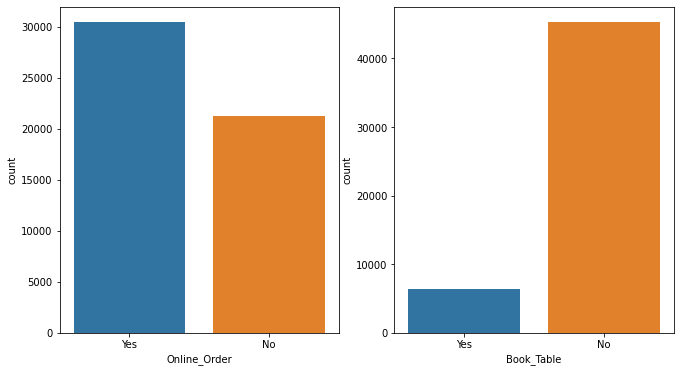

In [22]:
figure,axes=plt.subplots(1,2,figsize=(11,6))
cols=['Online_Order','Book_Table']
for i in range (len(cols)):
    sns.countplot(x=df[cols[i]],ax=axes[i])


* 30000 restaurants are accepting online order for zomato and 20000 restaurants not accepting online orders.
* more than 40000 restaurants don't have table booking facility and less than 10000 restaurants have table booking facility.

<AxesSubplot:xlabel='Book_Table'>

<Figure size 792x432 with 0 Axes>

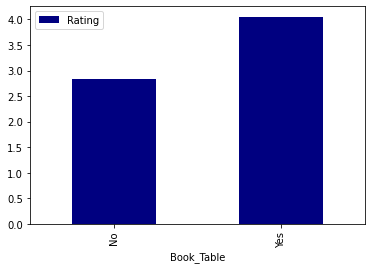

In [23]:
plt.figure(figsize=(11,6))
df.groupby('Book_Table').agg({'Rating':'mean'}).plot(kind='bar',cmap='jet')

* restaurants that have book table facility rated more than those which don't have book table option.

<AxesSubplot:>

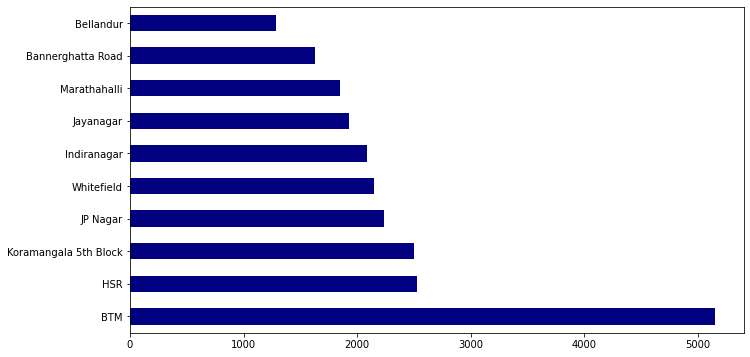

In [24]:
plt.figure(figsize=(11,6))
df['Location'].value_counts().nlargest(n=10).plot(kind='barh',cmap='jet')

* BTM is the best location for having food

<AxesSubplot:ylabel='Location'>

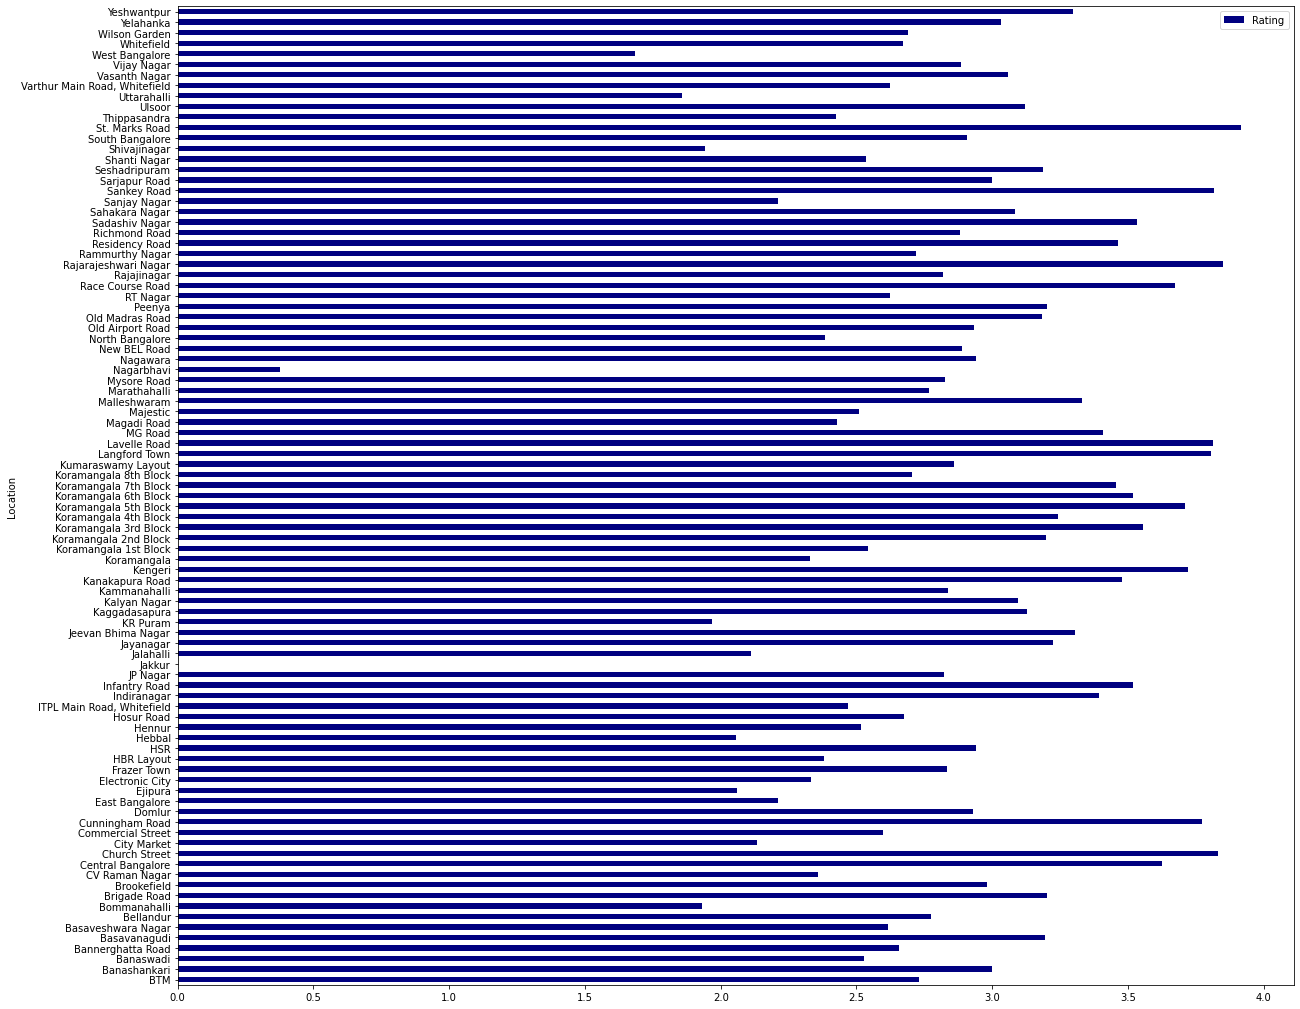

In [25]:
l=df.groupby('Location').agg({'Rating':'mean'})
l.plot(kind='barh',cmap='jet',figsize=(20,18))

*  st.marks road is good location by ratings

<AxesSubplot:>

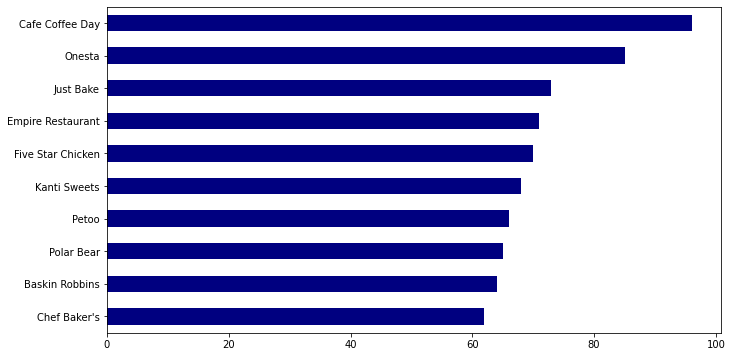

In [26]:
plt.figure(figsize=(11,6))
df['Restaurant_Name'].value_counts().nlargest(n=10).sort_values().plot(kind='barh',cmap='jet')

<AxesSubplot:>

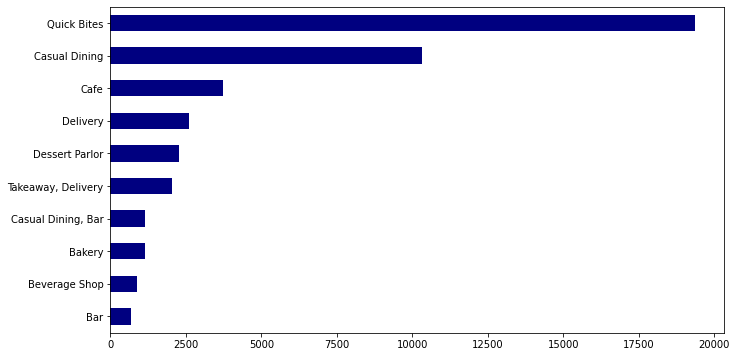

In [27]:
plt.figure(figsize=(11,6))
df['Restaurant_Type'].value_counts().nlargest(n=10).sort_values().plot(kind='barh',cmap='jet')


* most of the restaurants are type of Quick Bites & Casual dining

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

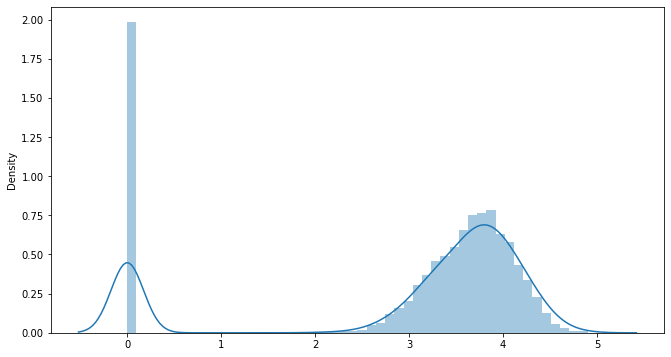

In [28]:
plt.figure(figsize=(11,6))
sns.distplot(x=df['Rating'])

<AxesSubplot:ylabel='Restaurant_Type'>

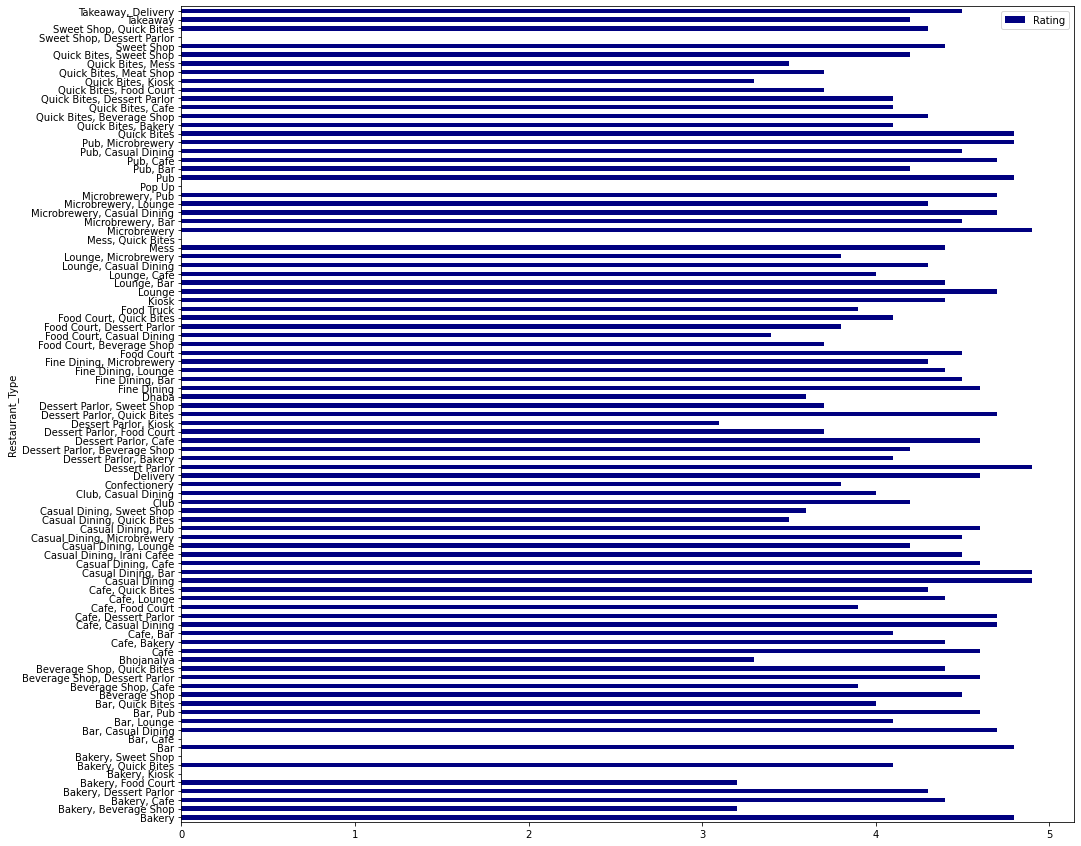

In [29]:
r=df.groupby('Restaurant_Type').agg({'Rating':'max'})
r.plot(kind='barh',cmap='jet',figsize=(16,15))

* microbrewery and dessert parlor are good restaurant types by rating.

<AxesSubplot:xlabel='Type', ylabel='count'>

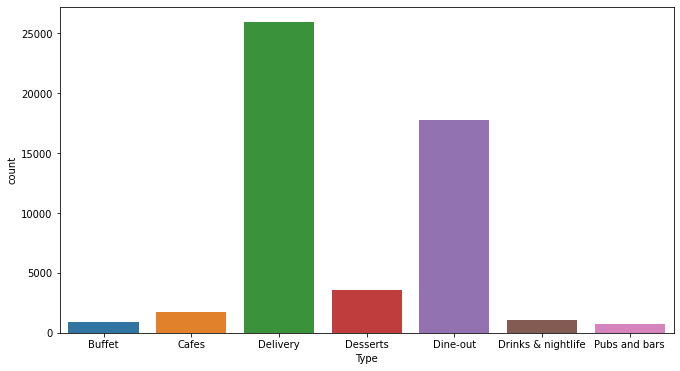

In [30]:
plt.figure(figsize=(11,6))
sns.countplot(x=df['Type'])

* Delivery types of restaurants are near to 25000 

<AxesSubplot:xlabel='Type', ylabel='Rating'>

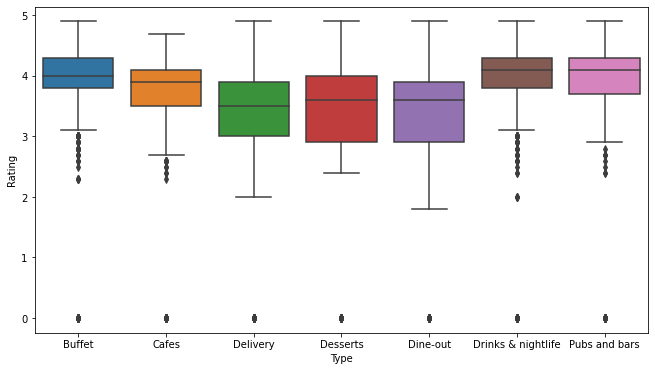

In [31]:
plt.figure(figsize=(11,6))
sns.boxplot(x=df['Type'],y=df['Rating'])

* Drinks and nightlife,Pubs and bars,buffet types of restaurants are high rated restaurants.

<AxesSubplot:>

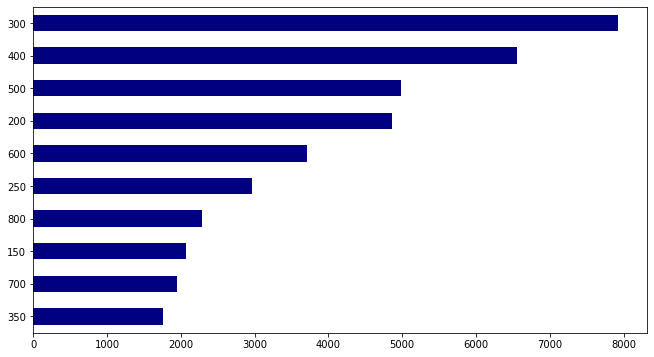

In [32]:
plt.figure(figsize=(11,6))
df['Cost_For_2'].value_counts().nlargest(n=10).sort_values().plot(kind='barh',cmap='jet')

* 300 is aggregated cost for 2 person in all restuarants

<AxesSubplot:xlabel='Restaurant_Name'>

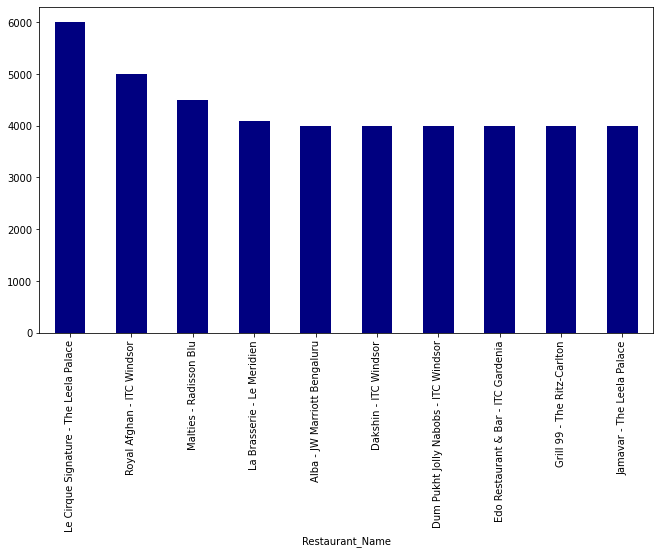

In [33]:
plt.figure(figsize=(11,6))
df.groupby('Restaurant_Name')['Cost_For_2'].max().nlargest(n=10).plot(kind='bar',cmap='jet')

* Le Cirque Signature-The Leela Palace is the most expensive restaurant.